# Classification des images avec un réseau pré-entraîné à l'aide de l'API Keras

Nous n'avons pas toujours besoin de former un classificateur à partir de zéro, surtout lorsque les images que nous voulons catégoriser ressemblent à celles sur lesquelles un autre réseau a été formé. Dans ces cas, nous pouvons simplement réutiliser le modèle, ce qui nous fait gagner beaucoup de temps. Dans cette recette, nous utiliserons un réseau pré-entraîné sur ImageNet pour classer une image personnalisée. Commençons !

**1.** Importez les packages requis. Ceux-ci incluent le réseau pré-entraîné utilisé pour la classification, ainsi que certaines fonctions d'assistance pour pré-traiter les images :

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.applications import imagenet_utils
from tensorflow.keras.applications.inception_v3 import *
from tensorflow.keras.preprocessing.image import *

**2.** Instancier un réseau InceptionV3 pré-entraîné sur ImageNet :

In [2]:
model = InceptionV3(weights='imagenet')

96124928/96112376 [==============================] - 1s 0us/step


**3.** Chargez l'image à classer. InceptionV3 prend une image de 299x299x3, nous devons donc la redimensionner en conséquence :

In [15]:
#https://github.com/bilal-rachik/Computer-Vision/raw/main/Image%20Classifcation/Images/dog.jpg

image = load_img(r'/content/dog.jpg', target_size=(299, 299))

**4.** Convertissez l'image en tableau numpy et encapsulez-la dans un lot singleton :

In [16]:
image = img_to_array(image)
image = np.expand_dims(image, axis=0)

**5.** Prétraitez l'image de la même manière qu'InceptionV3 :

In [17]:
image = preprocess_input(image)

**6.** Utilisez le modèle pour faire des prédictions sur l'image, puis décodez les prédictions dans une matrice :

In [18]:
predictions = model.predict(image)
prediction_matrix = (imagenet_utils
                     .decode_predictions(predictions))

49152/35363 [=========================================] - 0s 0us/step


**7.** Examinez les 5 meilleures prédictions ainsi que leur probabilité :

In [19]:
for i in range(5):
    imagenet_id, label, probability = prediction_matrix[0][i]
    print(f'{i + 1}. {label}: {probability * 100:.3f}%')

1. pug: 85.538%
2. French_bulldog: 0.585%
3. Brabancon_griffon: 0.543%
4. Boston_bull: 0.218%
5. bull_mastiff: 0.125%


**8.** Tracez l'image d'origine avec son étiquette la plus probable :

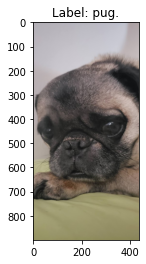

In [20]:
_, label, _ = prediction_matrix[0][0]
plt.figure()
plt.title(f'Label: {label}.')
original = load_img('dog.jpg')
original = img_to_array(original)
plt.imshow(original / 255.0)
plt.show()

Comme en témoigne ici, afin de classer les images sans effort, en utilisant un réseau pré-entraîné sur ImageNet, nous avons juste besoin d'instancier le bon modèle avec les bons poids, comme ceci : InceptionV3(weights='imagenet'). Cela téléchargera l'architecture et les poids si c'est la première fois que nous les utilisons ; sinon, une version de ces fichiers sera mise en cache dans notre système.

 Ensuite, nous avons chargé l'image que nous voulions classer, l'avons redimensionnée à des dimensions compatibles avec InceptionV3 (299x299x3), l'avons convertie en un lot singleton avec np.expand_dims(image, axe=0) et l'avons prétraitée de la même manière qu'InceptionV3 l'a fait quand il a été formé, avec preprocess_input(image).
 
Ensuite, nous avons obtenu les prédictions du modèle, que nous devons transformer en une matrice de prédiction à l'aide de imagenet_utils.decode_predictions(predictions). Cette matrice contient l'étiquette et les probabilités dans la 0e ligne, que nous avons inspectées pour obtenir les cinq classes les plus probables